### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor

In [3]:
train_X = pd.read_csv('./X_train_NHkHMNU.csv')
train_Y = pd.read_csv('./y_train_ZAN5mwg.csv')
test_X = pd.read_csv('./X_test_final.csv')

### Data exploration

In [4]:
train_X_exploration = train_X.copy()
train_Y_exploration = train_Y.copy()
combined_train_exploration = pd.concat([train_X_exploration, train_Y_exploration], axis=1)

In [5]:
combined_train_exploration.head()

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,ID,TARGET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,...,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445,1054,0.028313
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365,2049,-0.112516
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952,1924,-0.180840
3,297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948,297,-0.260356
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,...,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378,1101,-0.071733


In [6]:
combined_train_exploration['COUNTRY'] = combined_train_exploration['COUNTRY'].apply(lambda x: 0 if x == 'FR' else (1 if x == 'DE' else None))

In [7]:
combined_train_exploration.head()

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,ID,TARGET
0,1054,206,0,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,...,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445,1054,0.028313
1,2049,501,0,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365,2049,-0.112516
2,1924,687,0,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952,1924,-0.180840
3,297,720,1,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948,297,-0.260356
4,1101,818,0,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,...,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378,1101,-0.071733


In [8]:
combined_train_exploration.head()

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,ID,TARGET
0,1054,206,0,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,...,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445,1054,0.028313
1,2049,501,0,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365,2049,-0.112516
2,1924,687,0,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952,1924,-0.180840
3,297,720,1,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948,297,-0.260356
4,1101,818,0,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,...,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378,1101,-0.071733


In [9]:
combined_train_exploration.describe()

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,ID,TARGET
count,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1469.000000,1469.000000,1370.000000,1424.000000,1370.000000,...,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000
mean,1072.759036,591.861446,0.430388,0.427442,-0.020032,-0.145508,0.145508,-0.256332,-0.072643,0.256332,...,0.019357,0.109480,0.123099,0.009451,0.008404,0.058126,0.061724,0.080510,1072.759036,0.089934
std,618.013179,345.065043,0.495296,0.673412,0.918995,0.970226,0.970226,0.957443,1.075830,0.957443,...,1.051781,1.056243,1.054692,0.972394,1.003356,1.097768,1.033853,1.098624,618.013179,1.034582
min,0.000000,0.000000,0.000000,-2.265563,-1.462350,-2.856874,-2.634831,-2.464849,-2.825331,-2.279619,...,-1.726420,-1.880419,-1.895319,-4.549638,-5.787097,-5.349463,-5.706442,-4.281790,0.000000,-6.519268
25%,540.250000,292.250000,0.000000,-0.037421,-0.716771,-0.875213,-0.638867,-0.977214,-0.851500,-0.452252,...,-0.503927,-0.652135,-0.672614,-0.618259,-0.647948,-0.624238,-0.458038,-0.522968,540.250000,-0.219861
50%,1077.500000,591.000000,0.000000,0.357061,-0.394166,-0.164287,0.164287,-0.306899,0.099455,0.306899,...,-0.228147,-0.261571,-0.229031,-0.026306,-0.020889,0.008493,0.063312,0.054056,1077.500000,0.000000
75%,1597.500000,885.750000,1.000000,0.922057,0.650533,0.638867,0.875213,0.452252,0.794843,0.977214,...,0.154351,0.635050,0.824781,0.651832,0.699131,0.676415,0.641446,0.599094,1597.500000,0.269719
max,2146.000000,1215.000000,1.000000,2.033851,3.300640,2.634831,2.856874,2.279619,1.951516,2.464849,...,9.473201,5.085624,4.965028,2.858758,2.817239,5.674778,3.746576,5.471818,2146.000000,7.786578


In [10]:
combined_train_exploration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1494 non-null   int64  
 1   DAY_ID            1494 non-null   int64  
 2   COUNTRY           1494 non-null   int64  
 3   DE_CONSUMPTION    1494 non-null   float64
 4   FR_CONSUMPTION    1494 non-null   float64
 5   DE_FR_EXCHANGE    1469 non-null   float64
 6   FR_DE_EXCHANGE    1469 non-null   float64
 7   DE_NET_EXPORT     1370 non-null   float64
 8   FR_NET_EXPORT     1424 non-null   float64
 9   DE_NET_IMPORT     1370 non-null   float64
 10  FR_NET_IMPORT     1424 non-null   float64
 11  DE_GAS            1494 non-null   float64
 12  FR_GAS            1494 non-null   float64
 13  DE_COAL           1494 non-null   float64
 14  FR_COAL           1494 non-null   float64
 15  DE_HYDRO          1494 non-null   float64
 16  FR_HYDRO          1494 non-null   float64


In [11]:
numerical_columns = combined_train_exploration.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_columns.remove('ID')

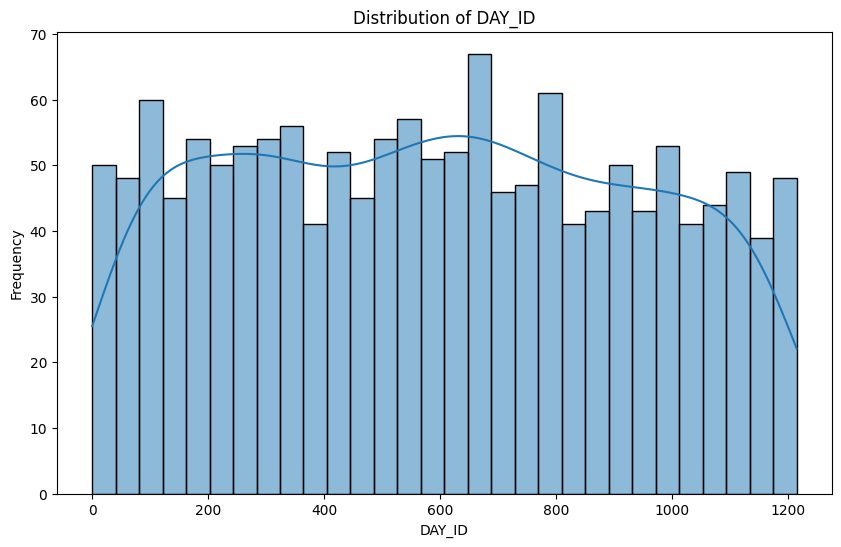

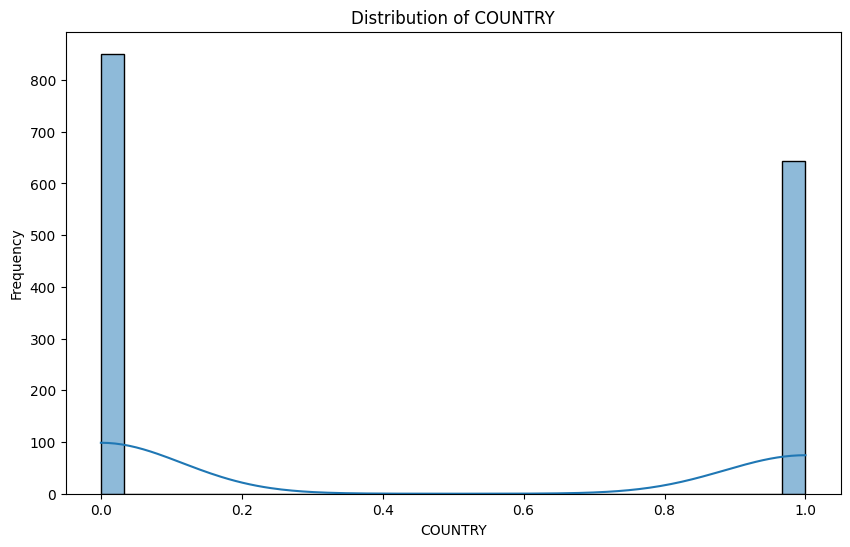

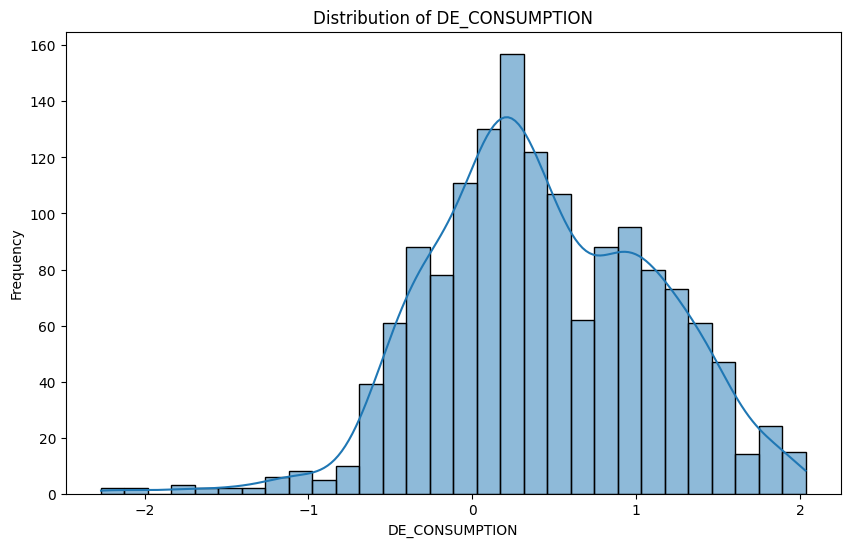

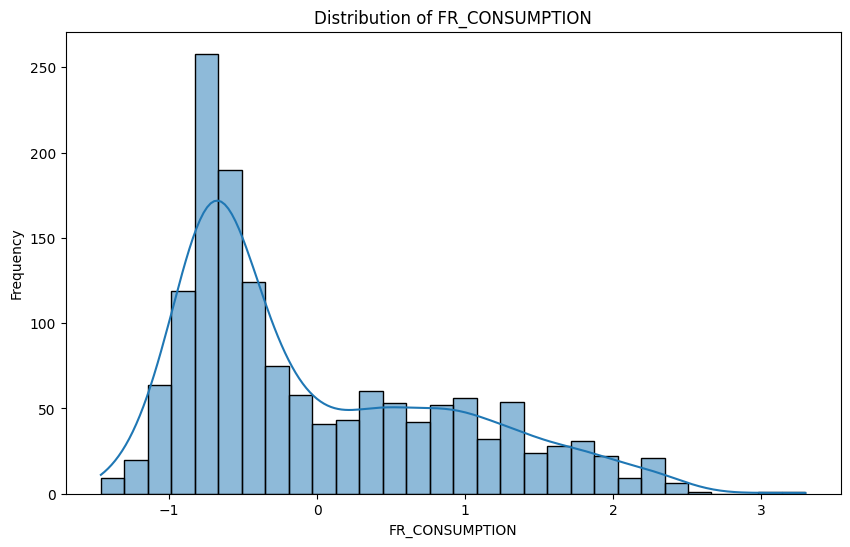

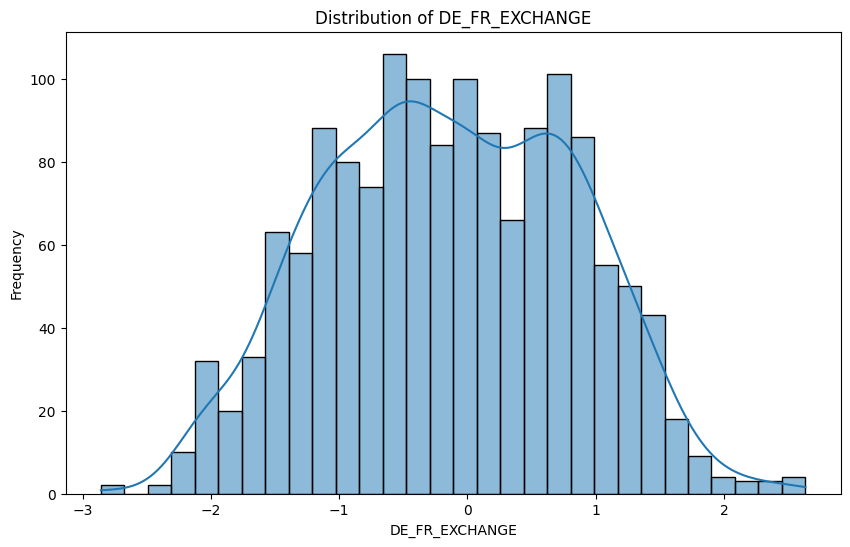

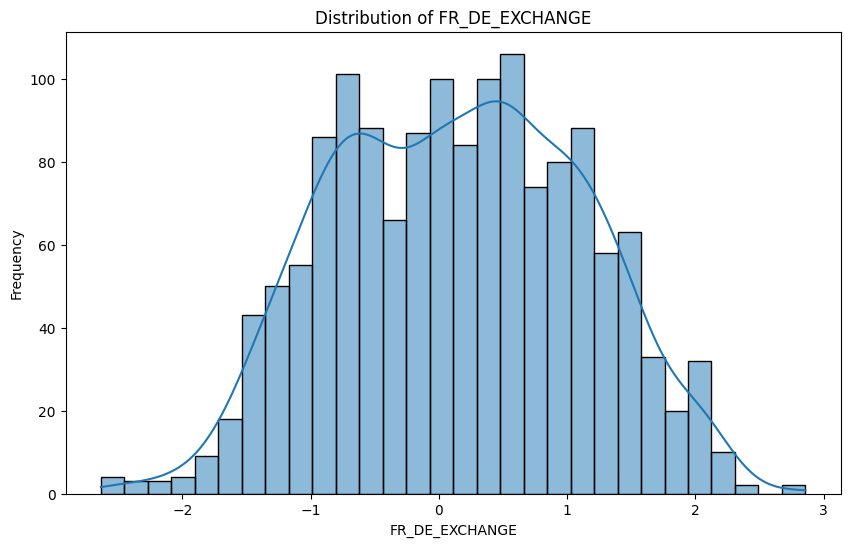

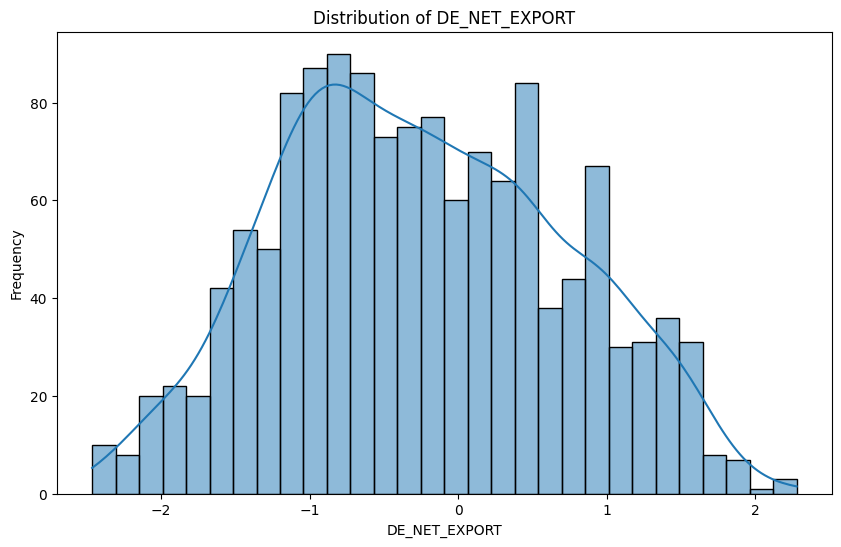

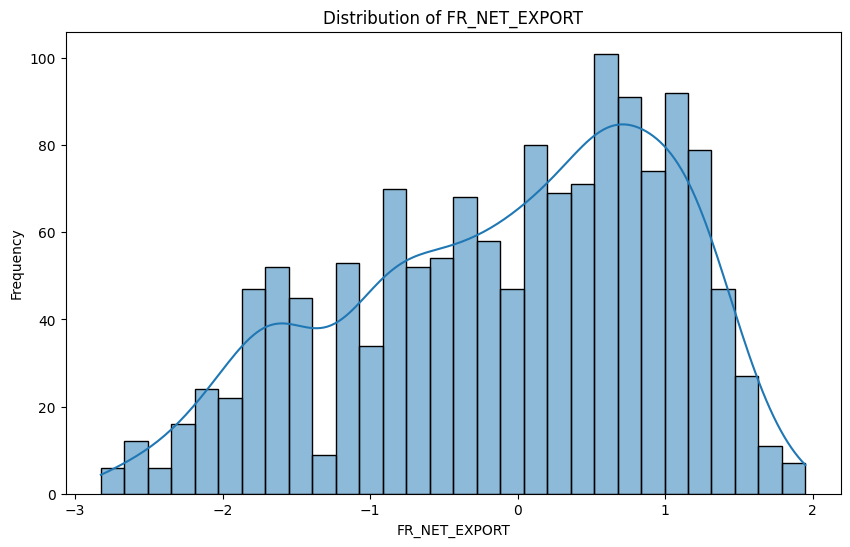

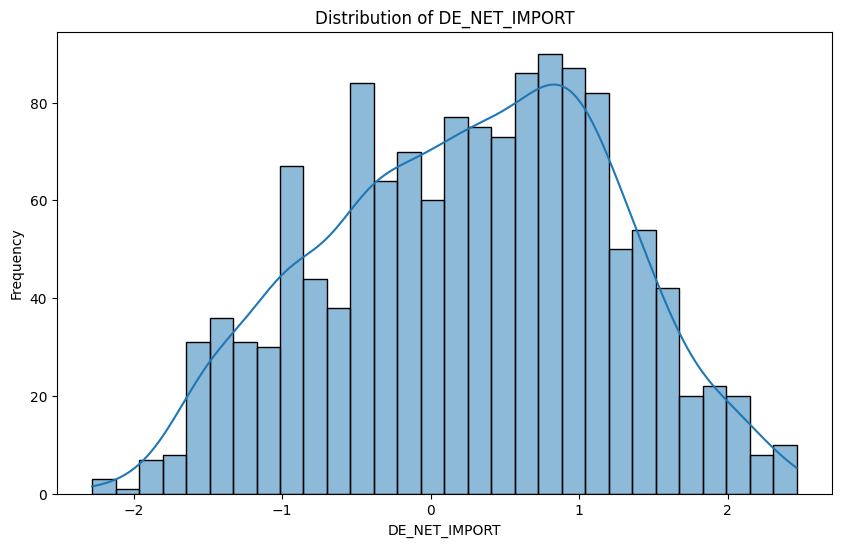

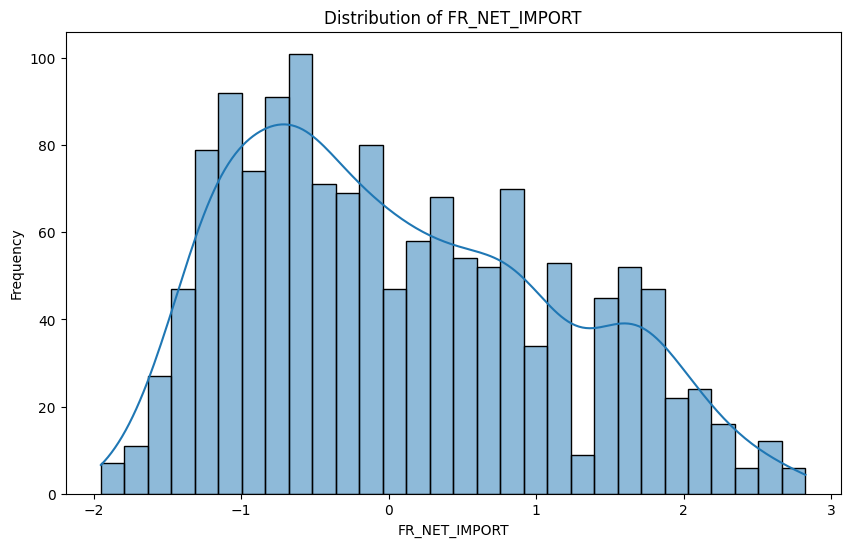

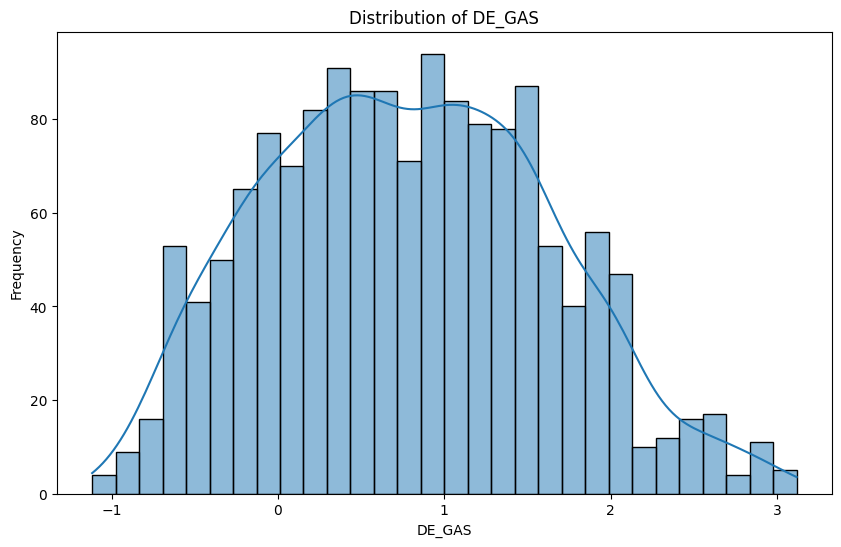

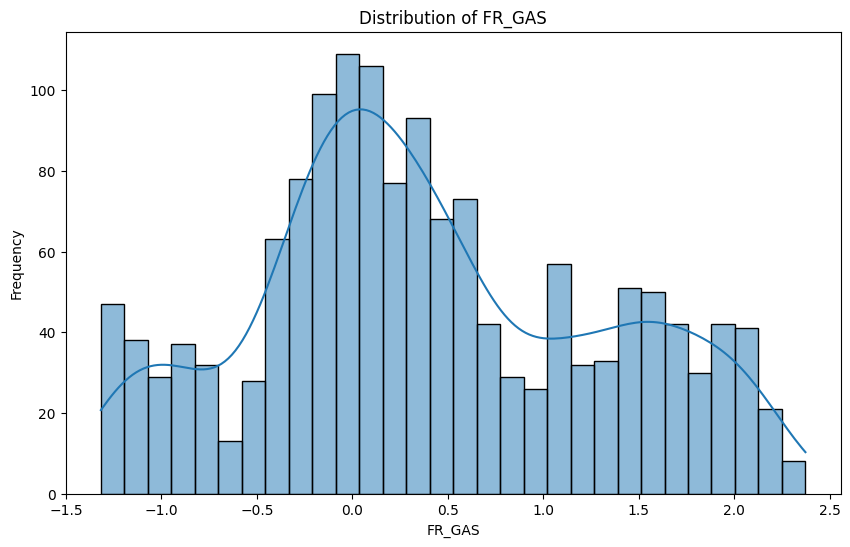

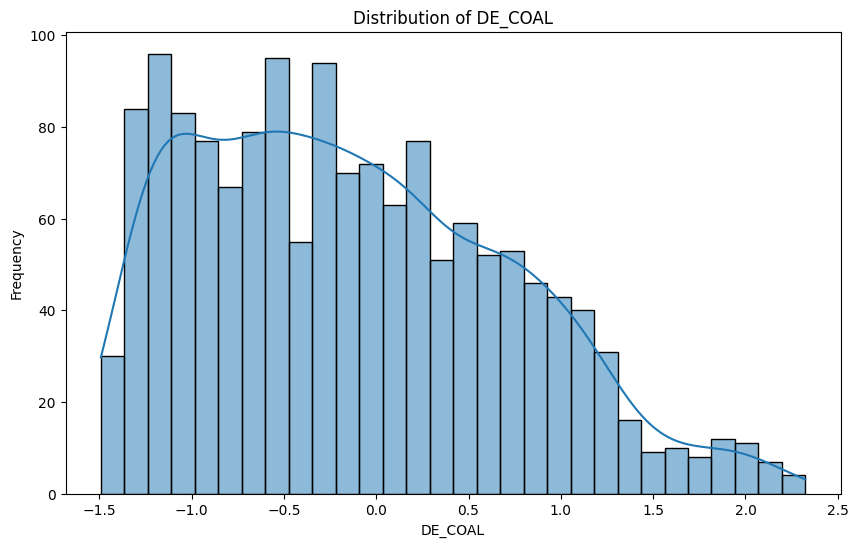

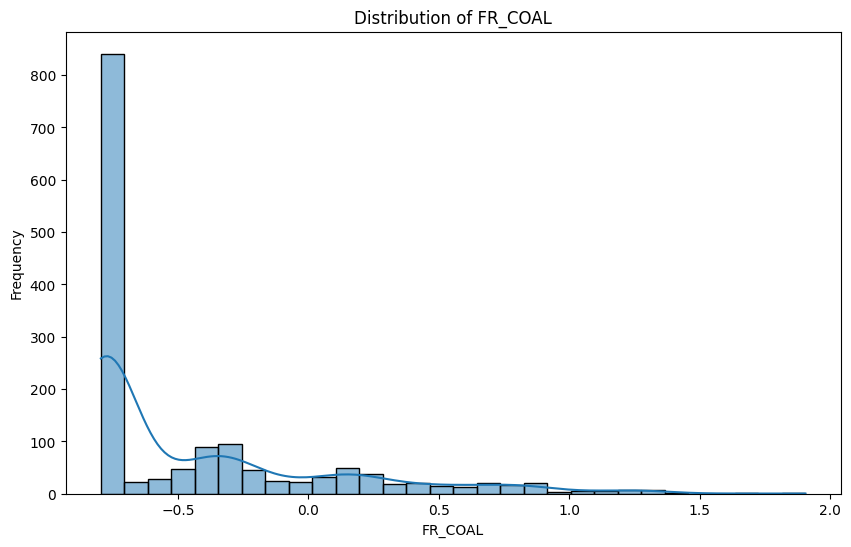

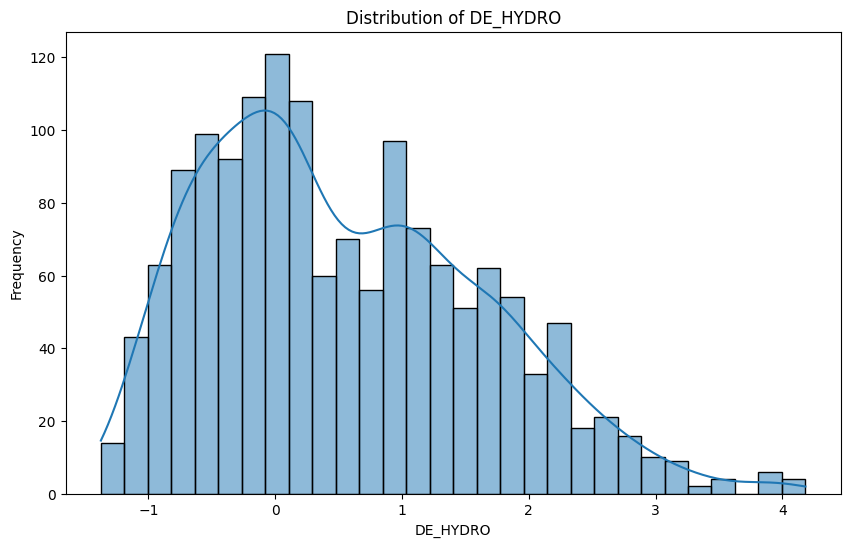

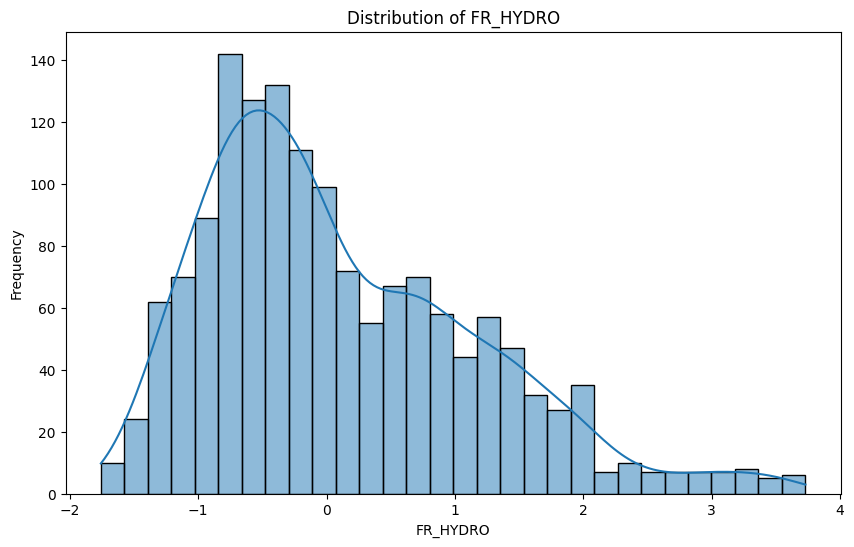

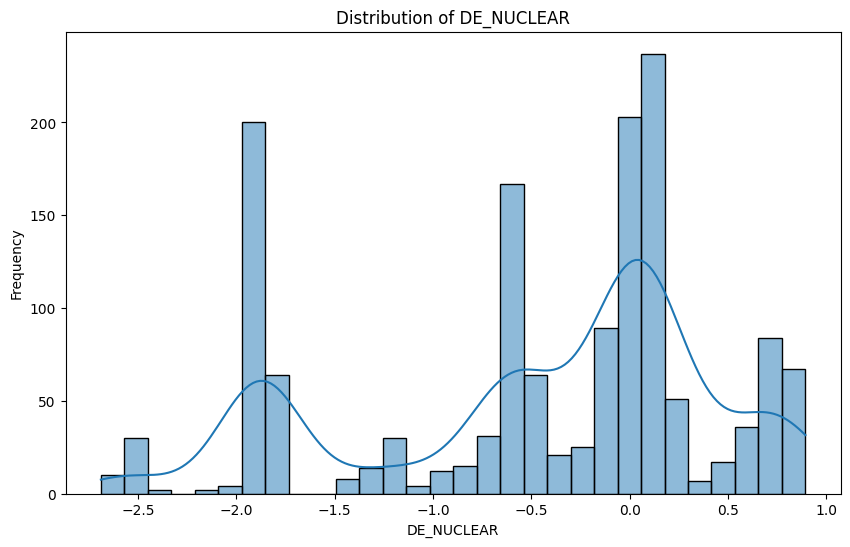

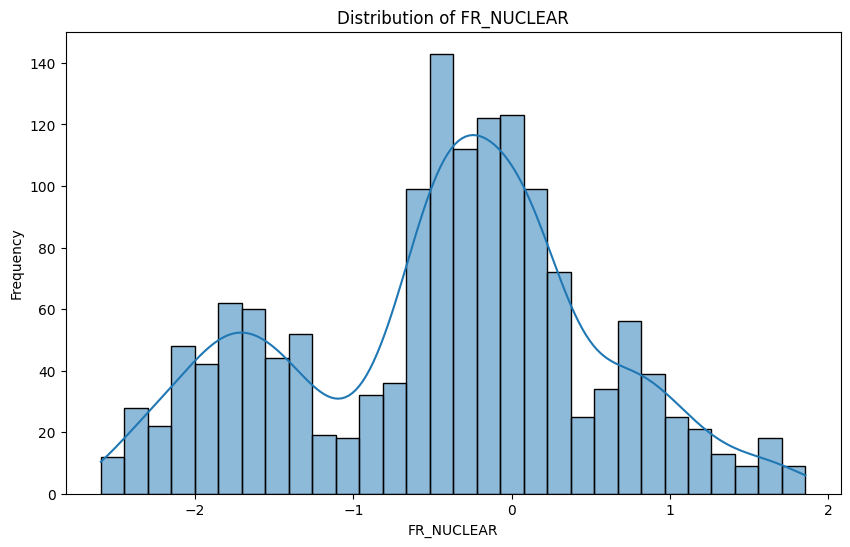

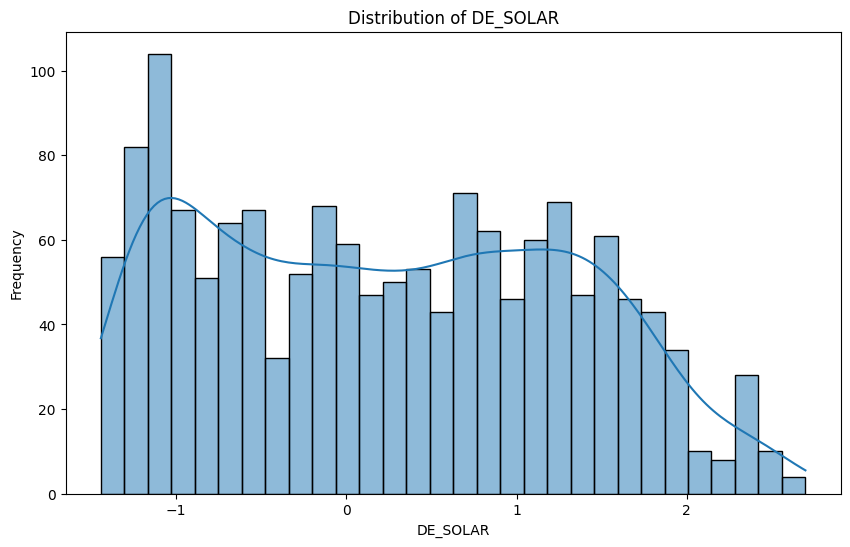

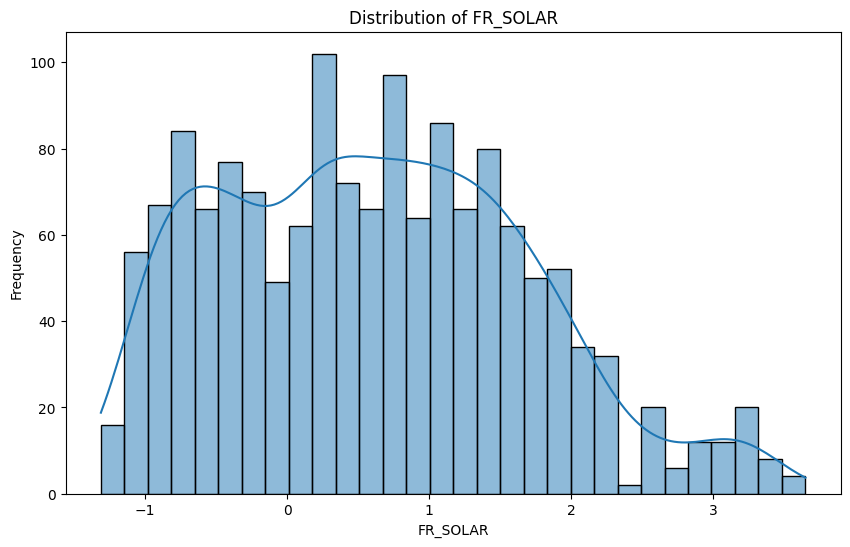

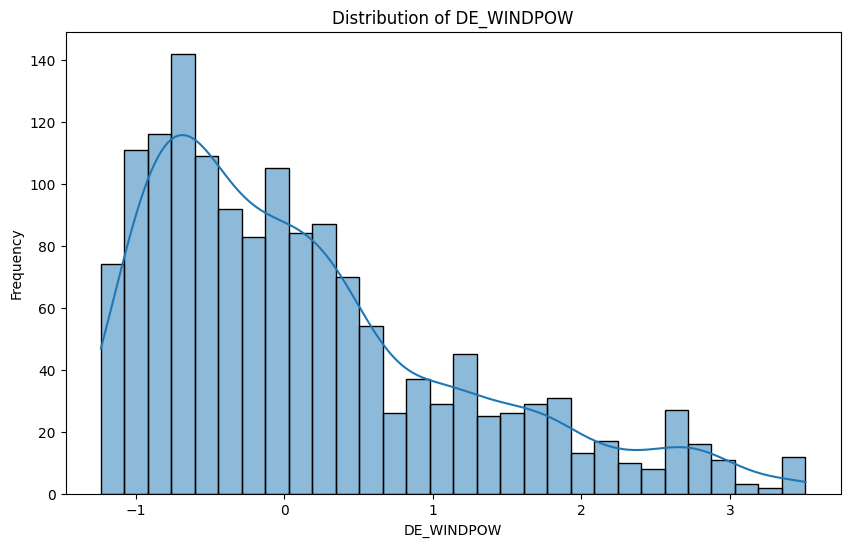

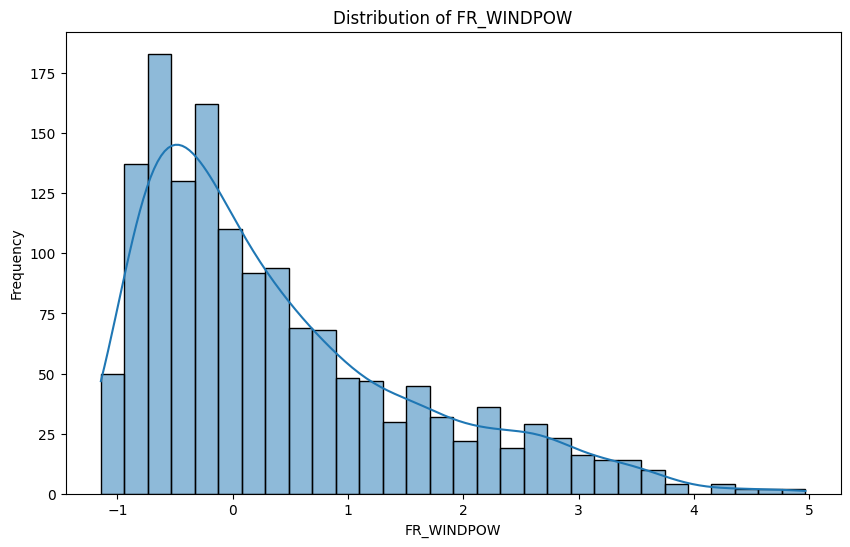

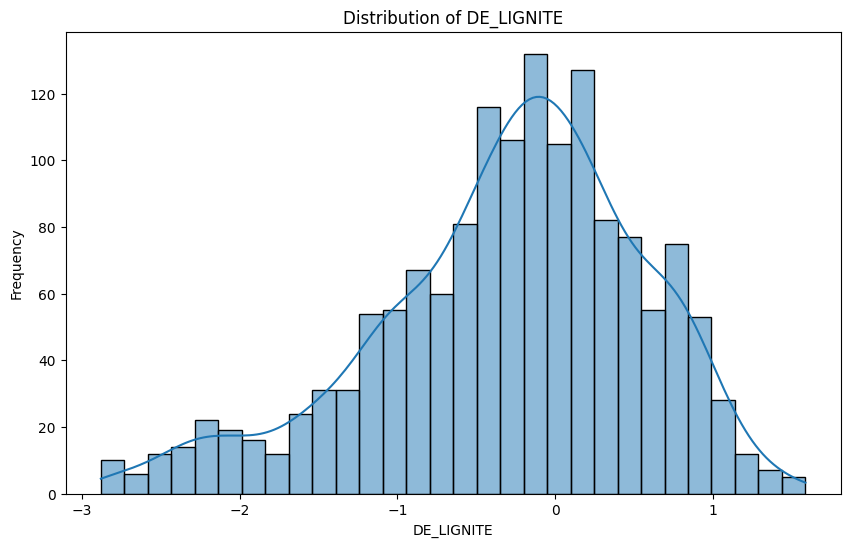

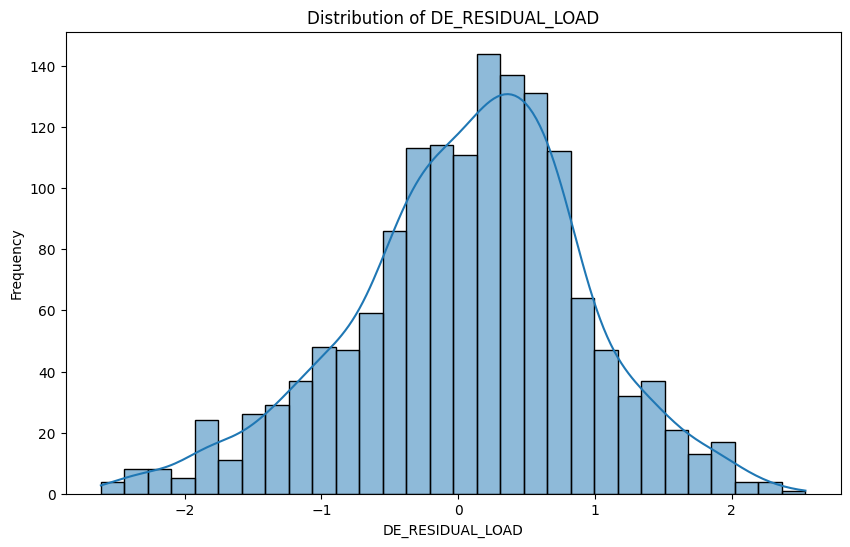

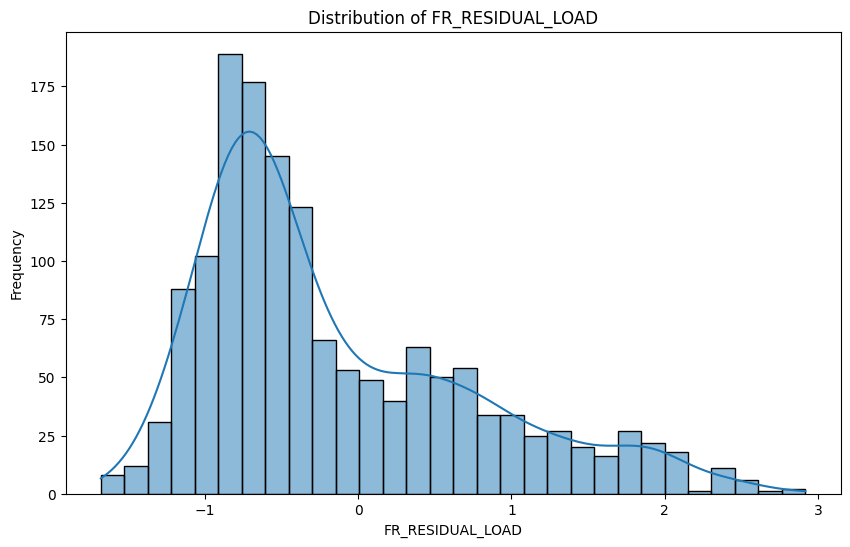

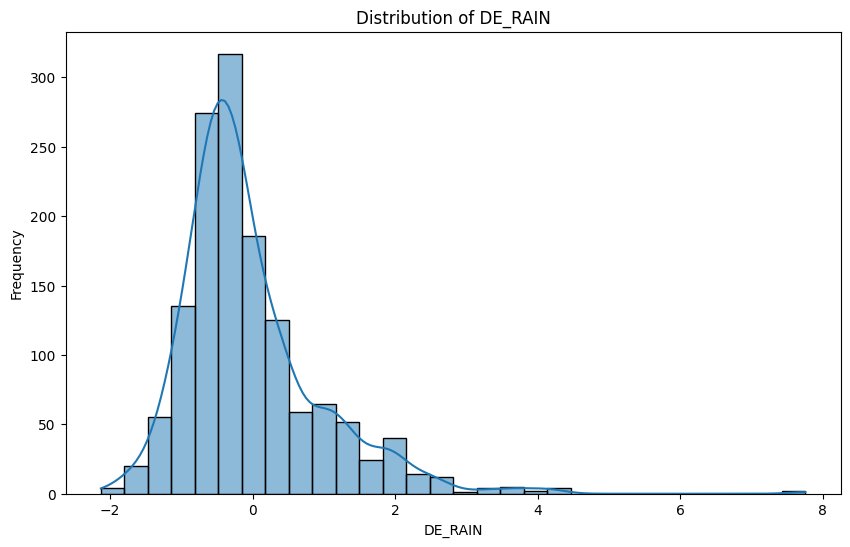

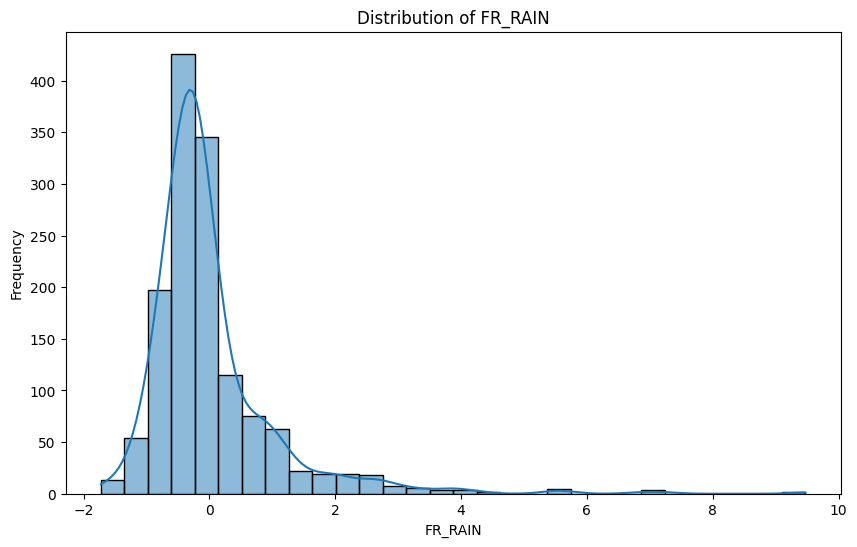

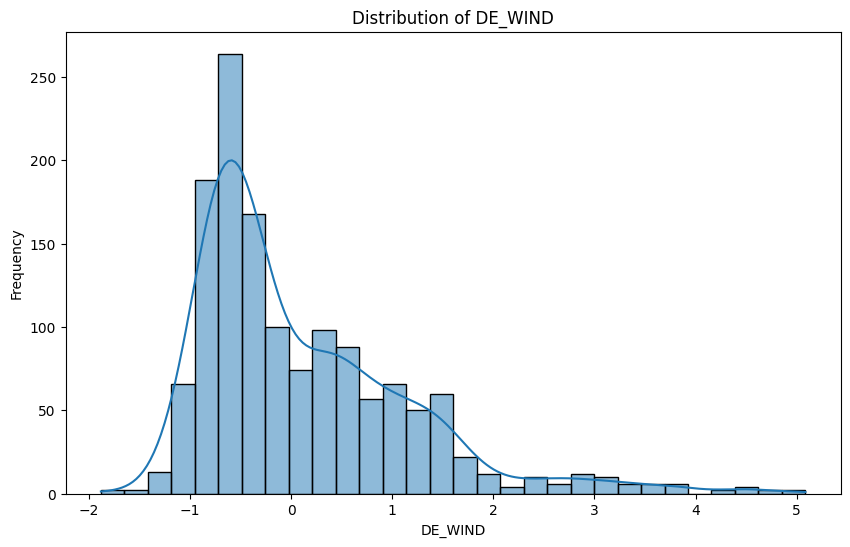

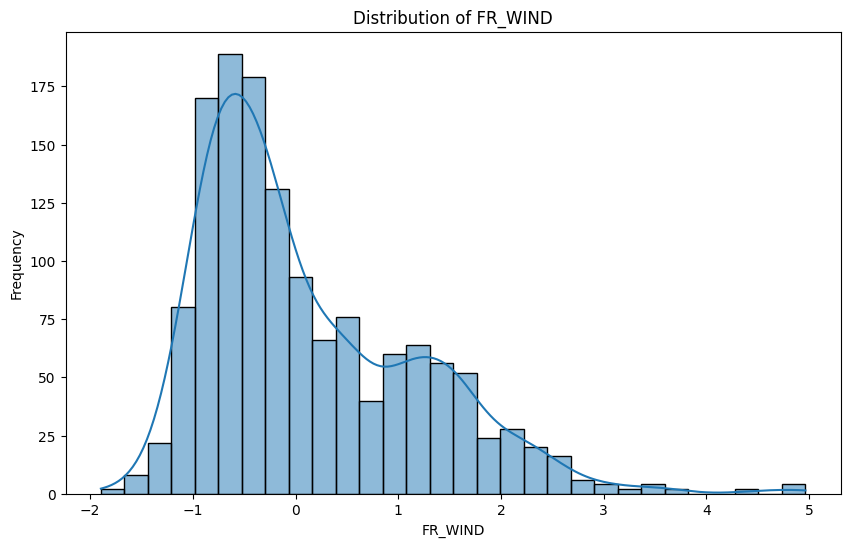

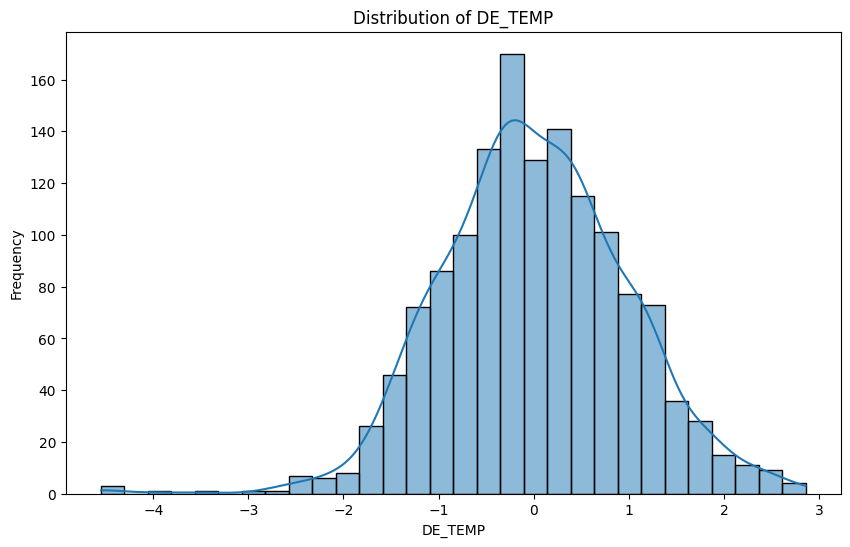

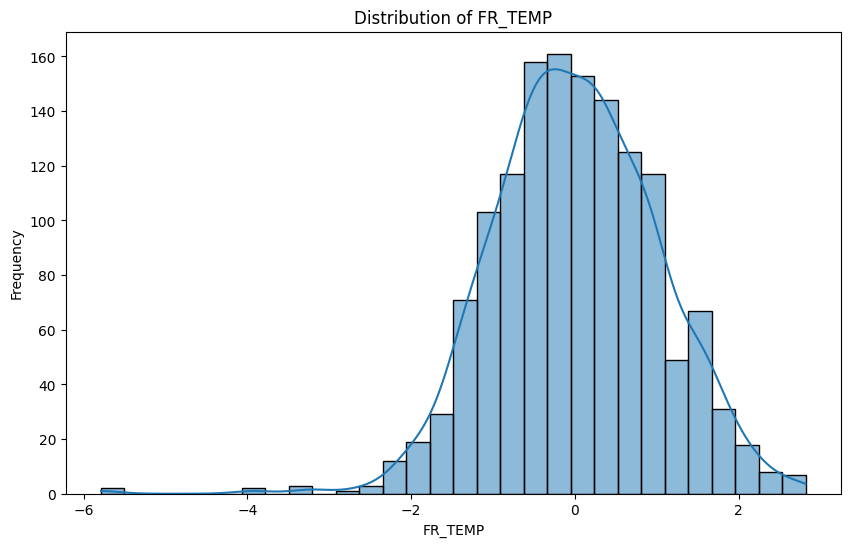

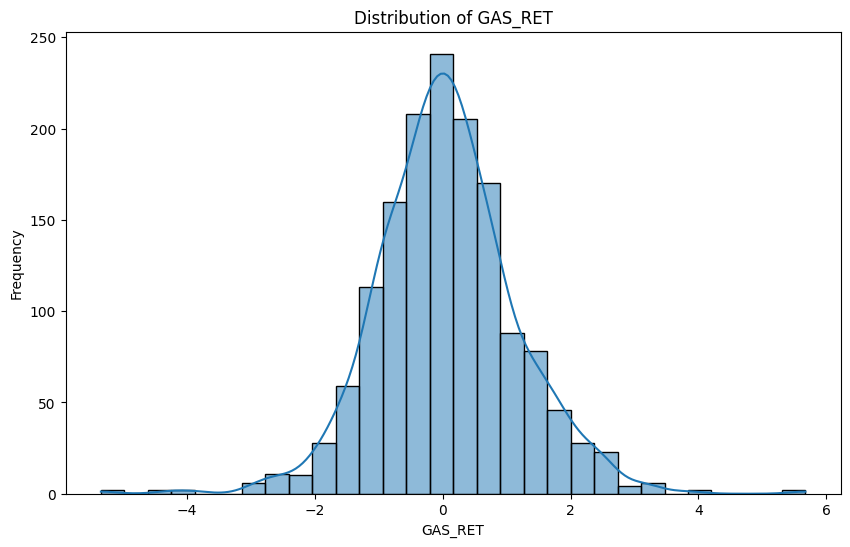

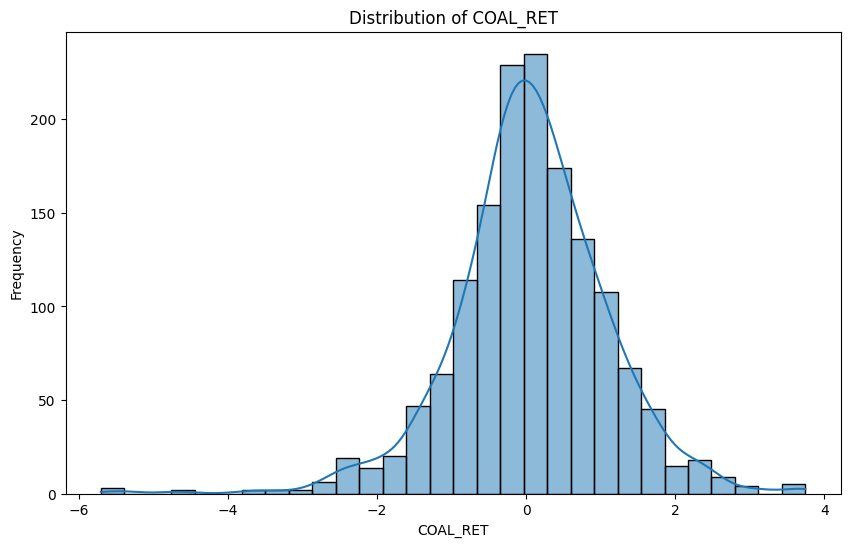

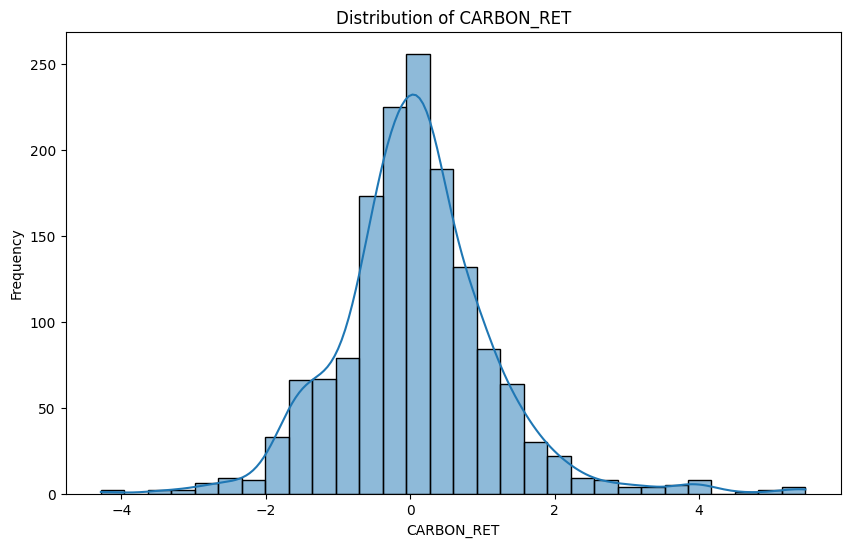

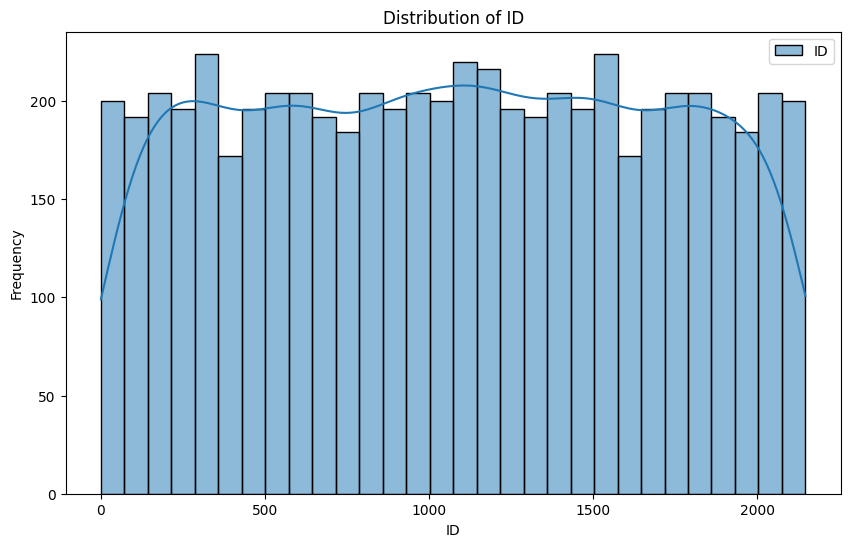

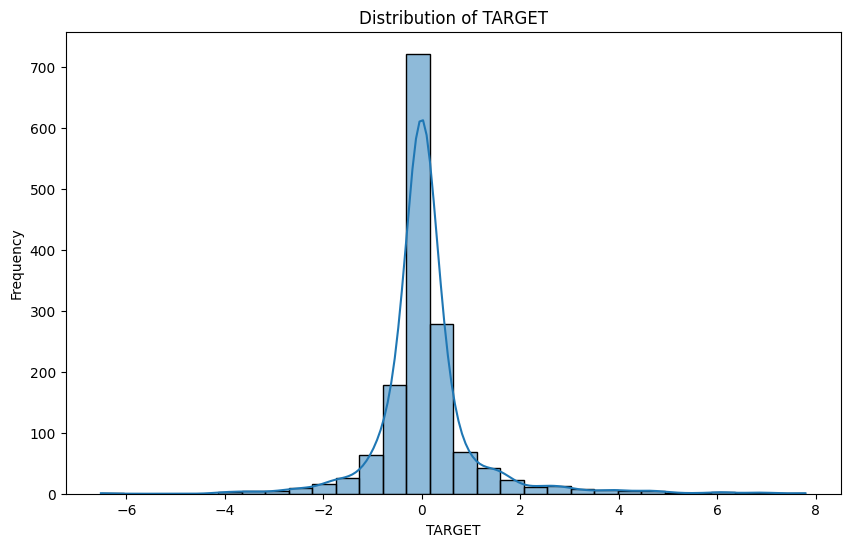

In [12]:
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(combined_train_exploration[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [13]:
relevant_columns = ['DE_FR_EXCHANGE',
 'DE_NET_EXPORT',
 'DE_NET_IMPORT',
 'DE_HYDRO',
 'FR_HYDRO',
 'FR_NUCLEAR',
 'DE_SOLAR',
 'FR_SOLAR',
 'DE_WINDPOW',
 'FR_WINDPOW',
 'FR_RESIDUAL_LOAD',
 'FR_RAIN',
 'DE_TEMP',
 'GAS_RET',
 'COAL_RET',
 'CARBON_RET','TARGET']

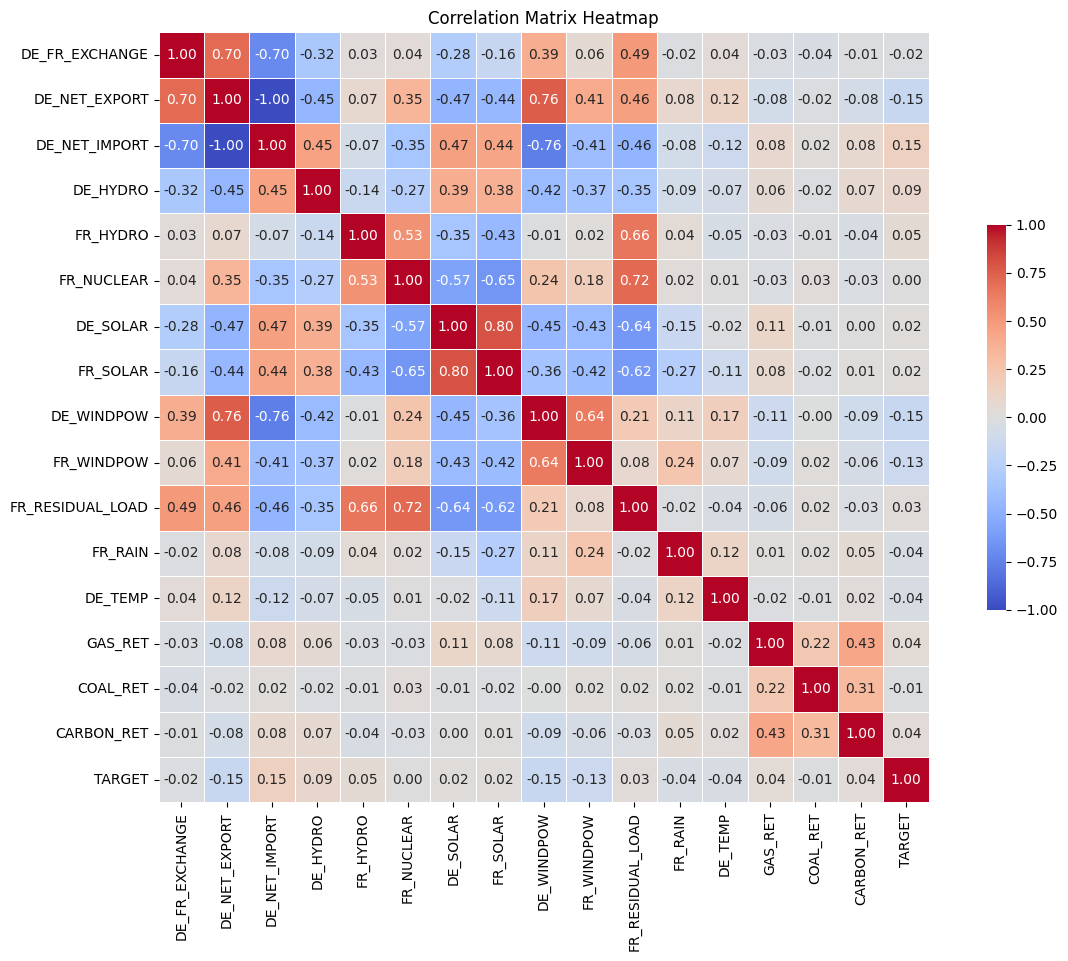

In [14]:
train_exploration_for_correlation = combined_train_exploration[relevant_columns]
correlation_matrix = train_exploration_for_correlation.corr()

plt.figure(figsize=(15, 10))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix Heatmap')
plt.show()


### Data Pre-processing

In [15]:
train_Y.drop(columns = ['ID'], axis =1, inplace = True )

In [16]:
train_X['is_train'] = 1
test_X['is_train'] = 0

combined_df = pd.concat([train_X, test_X], ignore_index=True)

In [17]:
combined_df['COUNTRY'] = combined_df['COUNTRY'].apply(lambda x: 0 if x == 'FR' else (1 if x == 'DE' else None))

In [18]:
combined_df['DE_CONSUMPTION_lag1'] = combined_df['DE_CONSUMPTION'].shift(1)
combined_df['FR_CONSUMPTION_lag1'] = combined_df['FR_CONSUMPTION'].shift(1)

In [19]:
combined_df.head()

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,is_train,DE_CONSUMPTION_lag1,FR_CONSUMPTION_lag1
0,1054,206,0,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,...,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445,1,NaN,NaN
1,2049,501,0,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365,1,0.210099,-0.427458
2,1924,687,0,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952,1,-0.022399,-1.003452
3,297,720,1,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948,1,1.395035,1.978665
4,1101,818,0,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,...,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378,1,-0.983324,-0.849198


In [20]:
combined_df['DE_TEMP_bin'] = pd.cut(combined_df['DE_TEMP'], bins=[-np.inf, 10, 20, np.inf], labels=['Cold', 'Moderate', 'Hot'])
combined_df['FR_TEMP_bin'] = pd.cut(combined_df['FR_TEMP'], bins=[-np.inf, 10, 20, np.inf], labels=['Cold', 'Moderate', 'Hot'])

In [21]:
combined_df = pd.get_dummies(combined_df, columns=['DE_TEMP_bin', 'FR_TEMP_bin'])

In [22]:
combined_df.head()

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,CARBON_RET,is_train,DE_CONSUMPTION_lag1,FR_CONSUMPTION_lag1,DE_TEMP_bin_Cold,DE_TEMP_bin_Moderate,DE_TEMP_bin_Hot,FR_TEMP_bin_Cold,FR_TEMP_bin_Moderate,FR_TEMP_bin_Hot
0,1054,206,0,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,...,-0.002445,1,NaN,NaN,1,0,0,1,0,0
1,2049,501,0,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-0.490365,1,0.210099,-0.427458,1,0,0,1,0,0
2,1924,687,0,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,0.204952,1,-0.022399,-1.003452,1,0,0,1,0,0
3,297,720,1,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,1.073948,1,1.395035,1.978665,1,0,0,1,0,0
4,1101,818,0,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,...,2.614378,1,-0.983324,-0.849198,1,0,0,1,0,0


In [23]:
combined_df = combined_df.fillna(0)

In [24]:
train_X = combined_df[combined_df['is_train'] == 1].drop(columns=['is_train'])
test_X = combined_df[combined_df['is_train'] == 0].drop(columns=['is_train'])

Using LASSO

In [25]:
from sklearn.linear_model import LassoCV
alphas = np.logspace(-4, -1, 100)
lasso = LassoCV(alphas=alphas, cv=10, random_state=42, max_iter=10000).fit(train_X, train_Y.values.ravel())
important_features = [feature for feature, coef in zip(train_X.columns, lasso.coef_) if coef != 0]

In [26]:
important_features

['ID',
 'DAY_ID',
 'DE_FR_EXCHANGE',
 'DE_NET_EXPORT',
 'DE_NET_IMPORT',
 'DE_HYDRO',
 'FR_HYDRO',
 'FR_NUCLEAR',
 'DE_SOLAR',
 'FR_SOLAR',
 'DE_WINDPOW',
 'FR_WINDPOW',
 'FR_RESIDUAL_LOAD',
 'FR_RAIN',
 'DE_TEMP',
 'GAS_RET',
 'COAL_RET',
 'CARBON_RET',
 'DE_CONSUMPTION_lag1']

In [27]:
train_X = train_X[important_features]
test_X = test_X[important_features]

In [28]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(train_X, train_Y, test_size=0.2, random_state=42)

In [29]:
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Bagging": BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
}

In [30]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [31]:
scores = {}
for name, model in models.items():
    model.fit(X_train_split, y_train_split)
    y_pred = model.predict(X_test_split)
    mse = mean_squared_error(y_test_split, y_pred)
    mae = mean_absolute_error(y_test_split, y_pred)
    scores[name] = mse
    print(f"{name} - MSE: {mse}, MAE: {mae}")

Decision Tree - MSE: 1.6233598896454853, MAE: 0.7879967993061486


<ipython-input-31-141f373cba0c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_split, y_train_split)


Random Forest - MSE: 1.2860761559750675, MAE: 0.6532405332862087


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting - MSE: 1.1654260450745628, MAE: 0.6213238139311353


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging - MSE: 1.2808222209010656, MAE: 0.6487208636504146


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost - MSE: 1.299723926687911, MAE: 0.6109821812449104


| Model            | MSE                | MAE               |
|------------------|--------------------|-------------------|
| Decision Tree    | 1.6233598896454853 | 0.7879967993061486|
| Random Forest    | 1.2860761559750675 | 0.6532405332862087|
| Gradient Boosting| 1.1654260450745628 | 0.6213238139311353|
| Bagging          | 1.2808222209010656 | 0.6487208636504146|
| AdaBoost         | 1.299723926687911  | 0.6109821812449104|


In [32]:
best_model_name = min(scores, key=scores.get)
best_model = models[best_model_name]

In [33]:
print(f"Best model: {best_model_name} with MSE: {scores[best_model_name]}")

Best model: Gradient Boosting with MSE: 1.1654260450745628


In [34]:
predictions = best_model.predict(test_X)

In [35]:
prediction_df = pd.DataFrame({'ID': test_X['ID'], 'TARGET': predictions})
prediction_df.to_csv('./predictions.csv', index=False)

PermutationExplainer explainer: 655it [00:56, 10.59it/s]


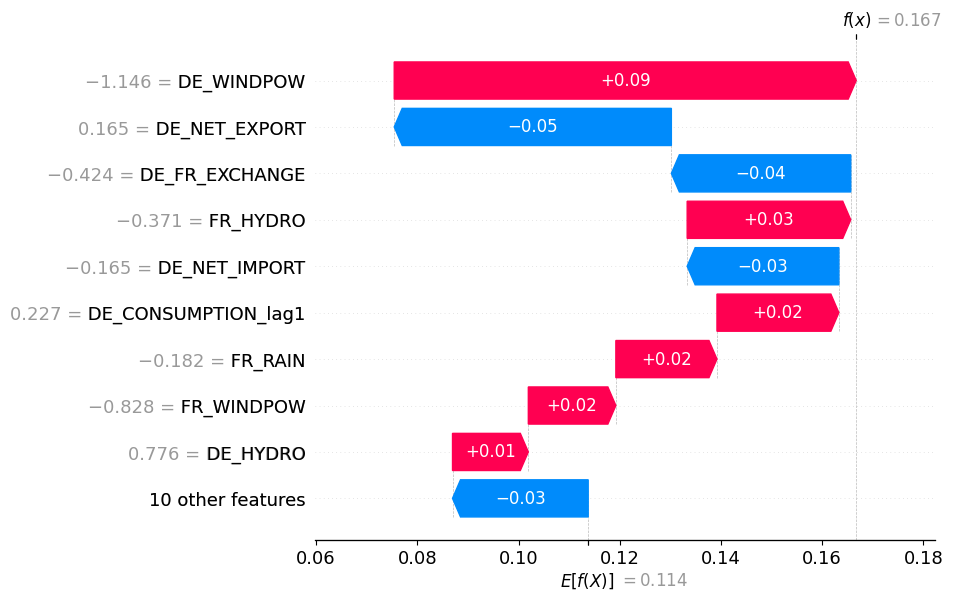

In [36]:
! pip install shap
import shap

explainer = shap.Explainer(best_model.predict, test_X)

shap_values = explainer(test_X)

shap.plots.waterfall(shap_values[0])